# Regression Models

## Goals

In this Assignmnet :

 - You Will impliment the regression models

## Tools
In this lab we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Pandas,  a Python library for data analysis

### Import Libraries

![Libraries](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Libraries.png?raw=true)


In [93]:
#Your code Here
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

###  Fetch Data From CSV Files

![Load Data](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Load%20N%20show.png?raw=true)

In [94]:
#Your code Here
#Read the trainig and testing data from the file
train_data = pd.read_csv('trainRegression.csv') # read training data
test_data = pd.read_csv('testRegression.csv') # read testing data


### Show Data

In [95]:
#Your code Here
#Show the first 5 rows of the training data
trd = train_data.head() # read first 5 rows
trd

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


##### Expected Output


![Output 1](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O1.png?raw=true)


### Type Casting of Data

![TypeCasting](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Type%20Casting.png?raw=true)


In [30]:
#Your code Here
#TypeCast the data into numpy array
train_x = np.array(train_data['X']) # separate train_x from training data
train_y = np.array(train_data['R']) # separate train_y from training data
test_x = np.array(test_data['X']) # separate test_x from testing data
test_y = np.array(test_data['R']) # separate test_y from testing data


### Plot Data

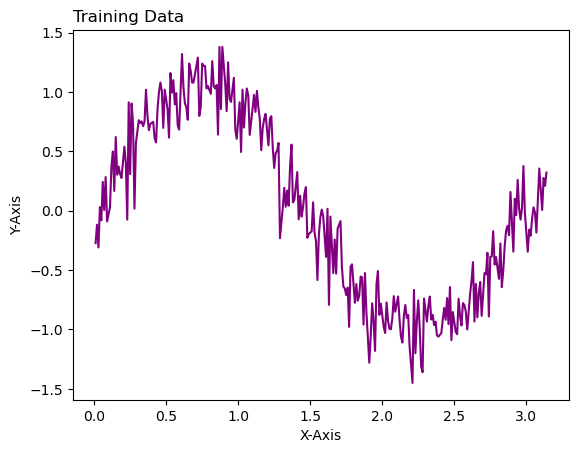

In [96]:
#Your code Here
#Plot your Training Data using matplotlib
plt.plot(train_x,train_y,color='purple') # make line plot , we can modify it and give colors
plt.title('Training Data', loc = 'left') # give title to graph and set location to left
plt.xlabel('X-Axis') # set label for X-axis
plt.ylabel('Y-Axis') # set label for Y-axis
plt.show() # display the graph


##### Expected Output


![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/O2.png?raw=true)


 ### Fit Linear Regression Model (Training data)

 As our linear Model was
 
![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

And using derivatives we transformed our model into 2 simultaneous equations

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Equations](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [134]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

rows = train_data.shape[0] # get the rows of training data

matrix_A = np.array([[rows,np.sum(train_x)],[np.sum(train_x),np.sum(train_x*train_x)]]) # make the confusion matrix 
matrix_B = np.array([[np.sum(train_y)],[np.dot(train_x,train_y)]]) # make the matrix B by summing y values and dot product of x & y

print(f'\nMatrix A : \n\n{matrix_A}') 
print(f'\nMatrix B : \n\n{matrix_B}')


Matrix A : 

[[283.     444.95  ]
 [444.95   932.7465]]

Matrix B : 

[[   1.39087  ]
 [-126.6414295]]


Expected output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Linear.png?raw=true)


#### Compute Valus of Both Θ`s


In [135]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node and 0_1

inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the Linear Model: \n\n {matrix_X}')

Matrix X for the Linear Model: 

 [[ 0.8736061 ]
 [-0.55251074]]


Expected Output

![Linear Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20LinearT.png?raw=true)


### Run Predictions (Testing data)

In [139]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

#matrix_X[0] = theta 0
#matrix_X[0] = theta 1

test_x = test_x.reshape(-1,1) # converting test_x into 2D matrix

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) # predict the values by the given formula
pred_y

array([ 0.8736061 ,  0.81835502,  0.76310395,  0.70785287,  0.6526018 ,
        0.59735072,  0.54209965,  0.48684858,  0.4315975 ,  0.37634643,
        0.32109535,  0.26584428,  0.2105932 ,  0.15534213,  0.10009106,
        0.04483998, -0.01041109, -0.06566217, -0.12091324, -0.17616432,
       -0.23141539, -0.28666646, -0.34191754, -0.39716861, -0.45241969,
       -0.50767076, -0.56292184, -0.61817291, -0.67342398, -0.72867506,
       -0.78392613, -0.83917721])

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion1.png?raw=true
)

In [140]:
#Your code Here
#Using cost function calculate the cost of the model

cost = (np.sum((pred_y - test_y)**2))/(len(test_y)) # put the values in the formula

print(f'\nMean Square Error for LINEAR MODEL is : {cost}\n')



Mean Square Error for LINEAR MODEL is : 0.3159321720459774



Expected Output

![MSE of Linear](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Linear.png?raw=true
)

### Plot Data (Train and Test Data)

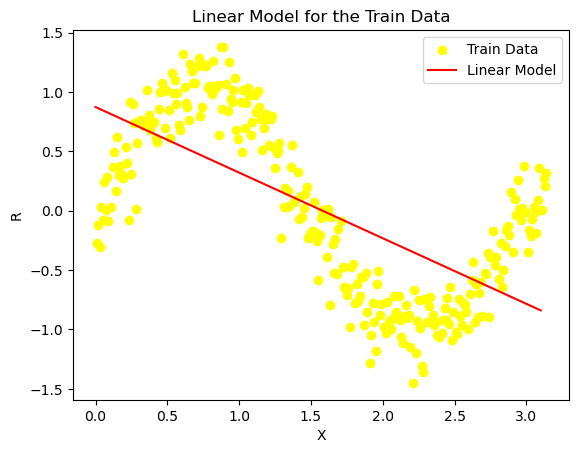

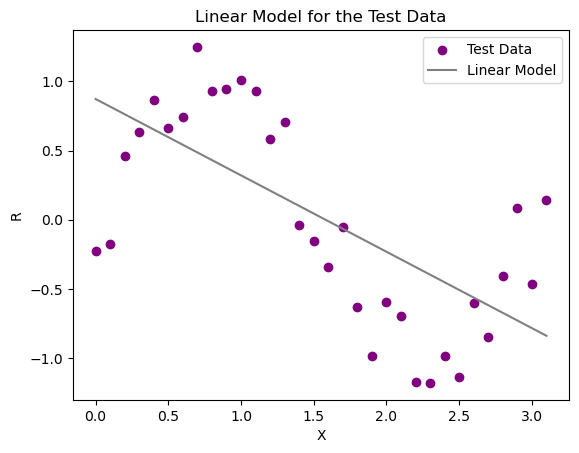

In [141]:
##Your code Here
#Plot the predicted values of y against the test_x

plt.title('Linear Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='yellow',label='Train Data') # plot the scatter on training sets
plt.plot(test_x,pred_y,color='red',label='Linear Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('Linear Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='purple',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='grey',label='Linear Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

### Expected Outputs for Linear Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Linear%20O%20test.png?raw=true)


## Now Fit The Quadratic Model

 As our Quadratic Model was
 
![Cost Funtion for quadratic ](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

And using derivatives we transformed our model into 3 simultaneous equations

![Model Equations of quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model%20Eqs.png?raw=true)


Then converted it in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20Model1.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [142]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 


matrix_A = np.array([[rows, np.sum(train_x), np.sum(train_x**2)],
                      [np.sum(train_x), np.sum(train_x**2), np.sum(train_x**3)],
                     [np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4)],
                     ]) # make the confusion matrix! As the degree of the model increases the dimensions also increases, so we just follow the pattern to make the confusion matrix


print(f'\nMatrix A : \n\n{matrix_A}')

matrix_B = np.array([[np.sum(train_y)],
                     [np.dot(train_x,train_y)],
                     [np.sum(train_y*(train_x*train_x))],
                    ]) # make the matrix B, same for it as the dim increases, its values also increases by the pattern that power of x is increased by 1 followed by its product with y and their summation

print(f'\nMatrix B : \n\n{matrix_B}')



Matrix A : 

[[ 283.          444.95        932.7465    ]
 [ 444.95        932.7465     2199.781025  ]
 [ 932.7465     2199.781025   5533.85257677]]

Matrix B : 

[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]]


Expected Output

![Quadratic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad1.png?raw=true)

#### Compute Valus Of Three Θ`s


In [143]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 and 0_2

inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the Quadratic Model: \n\n {matrix_X}')


Matrix X for the Quadratic Model: 

 [[ 1.10611454]
 [-0.99606599]
 [ 0.14104585]]


Expected Output

![Quadratic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Quad.png?raw=true)


### Run Predictions (Testing data)

In [144]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

#matrix_X[0] = theta 0
#matrix_X[1] = theta 1
#matrix_X[2] = theta 2

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) + np.dot(test_x**2,matrix_X[2]) # predict the values by the given formula
pred_y

array([ 1.10611454,  1.0079184 ,  0.91254317,  0.81998887,  0.73025548,
        0.643343  ,  0.55925145,  0.47798081,  0.39953109,  0.32390228,
        0.25109439,  0.18110742,  0.11394137,  0.04959623, -0.01192799,
       -0.0706313 , -0.12651368, -0.17957515, -0.22981571, -0.27723534,
       -0.32183406, -0.36361187, -0.40256875, -0.43870472, -0.47201977,
       -0.50251391, -0.53018713, -0.55503943, -0.57707081, -0.59628128,
       -0.61267083, -0.62623946])

### Mean Square Error

![Cost Funtion](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cost%20funtion2.png?raw=true
)

In [145]:
#Your code Here
#Using cost function calculate the cost of the model

cost = np.sum((pred_y - test_y)**2)/len(test_y) # put the values in the formula

print(f'\nMean Square Error for Quadratic MODEL is : {cost}\n')


Mean Square Error for Quadratic MODEL is : 0.3260417959496285



Expected Output

![MSE of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Quad.png?raw=true
)

### Plot Data (Train and Test Data)

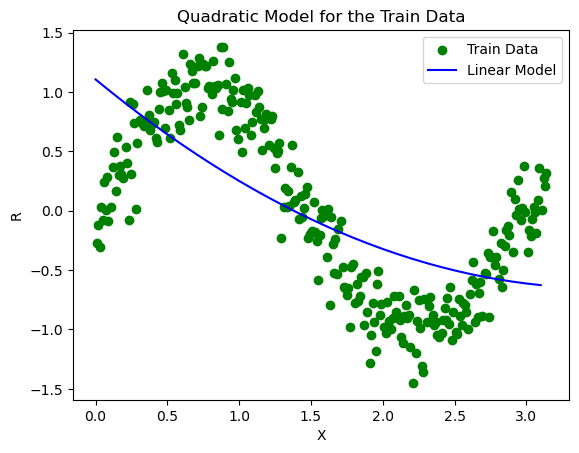

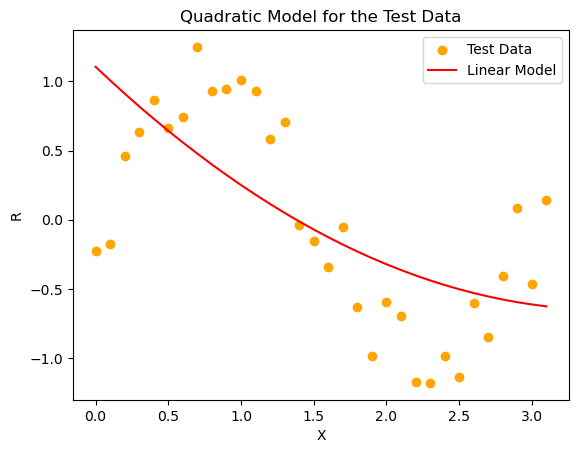

In [146]:
##Your code Here
#Plot the predicted values of y against the test_x
plt.title('Quadratic Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='green',label='Train Data') # plot the scatter on training sets
plt.plot(test_x,pred_y,color='blue',label='Linear Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('Quadratic Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='orange',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='red',label='Linear Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

### Expected Outputs for Quadratic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Quad%20O%20tets.png?raw=true)


## Now Fit The Cubic Model

Cubic Model in matrix form

![Model Formula of Quadratic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20Model.png?raw=true)



NOTE :  Now you are required to compute values wihtout using foor loop on tarining data
- HINT : Use numpy library for this purpose 

In [147]:
#Your code Here
#For loop is not recommended in these cases, 
#use numpy functions to calculate the values of above variables in one line of code.
#Such as x.shape for number of rows, sum() for sum of all elements in x
#np.dot() or multiply suntion for square of x 

matrix_A = np.array([[rows, np.sum(train_x), np.sum(train_x**2),np.sum(train_x**3)],
                      [np.sum(train_x), np.sum(train_x**2), np.sum(train_x**3),np.sum(train_x**4)],
                      [np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5)],
                      [np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6)],
                     ]) # make the confusion matrix!

print(f'\nMatrix A : \n\n{matrix_A}')

matrix_B = np.array([[np.sum(train_y)],
                     [np.dot(train_x,train_y)],
                     [np.sum(train_y*(train_x**2))],
                     [np.sum(train_y*(train_x**3))],
                    ]) # make the matrix B

print(f'\nMatrix B : \n\n{matrix_B}')




Matrix A : 

[[  283.           444.95         932.7465      2199.781025  ]
 [  444.95         932.7465      2199.781025    5533.85257677]
 [  932.7465      2199.781025    5533.85257677 14501.33829628]
 [ 2199.781025    5533.85257677 14501.33829628 39086.48841058]]

Matrix B : 

[[   1.39087   ]
 [-126.6414295 ]
 [-378.87568955]
 [-952.32410353]]


Expected Output

![Cubic Model Matrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic1.png?raw=true)

#### Compute Valus Of Four Θ`s


In [148]:
#Your code Here
#Calculate the values of 0_node and 0_1 using Matrix Multiplication
#Hint: Use X = A^-1 * B to calculate the values of 0_node , 0_1 ,0_2 and 0_3

inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the Cubic Model: \n\n {matrix_X}')


Matrix X for the Cubic Model: 

 [[-0.18862637]
 [ 3.94071895]
 [-3.78251095]
 [ 0.83166145]]


Expected Output

![Cubic Model MAtrixes](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Matrixs%20Cubic.png?raw=true)


### Run Predictions (Testing data)

In [149]:
# Your code Here
# In order to calculate the pridicted values of y
# Use the formula y = 0_node + 0_1 * x
# _____DO NOT USE FOR LOOP_____
# instead Convert the column of test_x into numpy a 2 dimensional matrix
# then use matrix multiplication to calculate the predicted values of y

# predict the values by the given formula
#matrix_X[0] = theta 0
#matrix_X[1] = theta 1
#matrix_X[2] = theta 2
#matrix_X[3] = theta 3

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) + np.dot(test_x**2,matrix_X[2]) + np.dot(test_x**3,matrix_X[3])
pred_y

array([-0.18862637,  0.16845208,  0.45487027,  0.67561819,  0.83568579,
        0.94006305,  0.99373993,  1.00170641,  0.96895245,  0.90046802,
        0.80124308,  0.67626762,  0.53053159,  0.36902497,  0.19673773,
        0.01865982, -0.16021877, -0.33490808, -0.50041814, -0.65175898,
       -0.78394064, -0.89197314, -0.97086652, -1.0156308 , -1.02127602,
       -0.98281221, -0.89524941, -0.75359763, -0.55286692, -0.2880673 ,
        0.04579119,  0.45369852])

### Mean Square Error

In [152]:
#Your code Here
#Using cost function calculate the cost of the model

cost = (np.sum((pred_y - test_y)**2))/len(test_y) # put the values in the formula

print(f'\nMean Square Error for CUBIC MODEL is : {cost}\n')


Mean Square Error for CUBIC MODEL is : 0.05154205769095602



Expected Output

![MSE of Cubic](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/MSE%20Cubic.png?raw=true
)

### Plot Data (Train and Test Data)

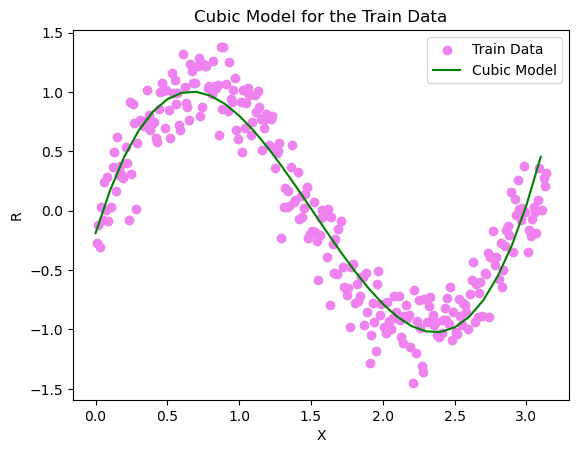

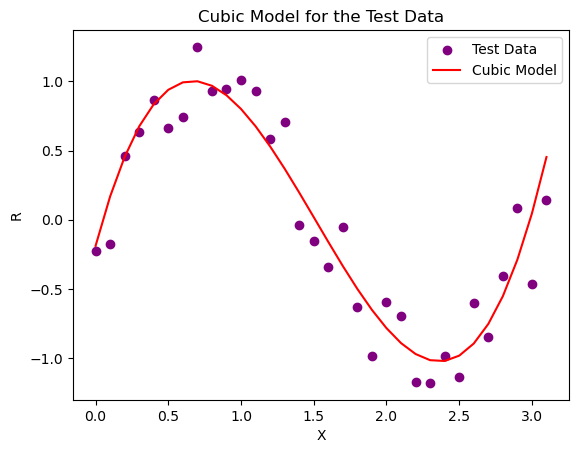

In [153]:
##Your code Here
#Plot the predicted values of y against the test_x

plt.title('Cubic Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='violet',label='Train Data') # plot the scatter on training sets
plt.plot(test_x,pred_y,color='green',label='Cubic Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('Cubic Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='purple',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='red',label='Cubic Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

### Expected Outputs for Cubic Model

![Training Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O.png?raw=true)

![Test Data Plot](https://github.com/ahmad-14a/CS-F20-ML/blob/main/Regression-Assignment%202/Cubic%20O%20test.png?raw=true)


### Now You Are Required To Fit Your 4 , 5 and 6 degree Models Step By Step As You Did Before

## Now Fit The 4 degree Model

In [154]:
#Your code Here
matrix_A = np.array([[rows, np.sum(train_x), np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4)],
                      [np.sum(train_x), np.sum(train_x**2), np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5)],
                      [np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6)],
                      [np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7)],
                      [np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8)],
                     ]) # make the confusion matrix!

print(f'\nMatrix A : \n\n{matrix_A}')

matrix_B = np.array([[np.sum(train_y)],
                     [np.dot(train_x,train_y)],
                     [np.sum(train_y*(train_x**2))],
                     [np.sum(train_y*(train_x**3))],
                     [np.sum(train_y*(train_x**4))],
                    ]) # make the matrix B

print(f'\nMatrix B : \n\n{matrix_B}')



Matrix A : 

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05]]

Matrix B : 

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]]


#### Compute Valus Of Five Θ`s

In [155]:
inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the 4th Degree Model: \n\n {matrix_X}')

Matrix X for the 4th Degree Model: 

 [[-0.40789474]
 [ 5.3320982 ]
 [-5.77179206]
 [ 1.81519401]
 [-0.15632916]]


### Run Predictions (Testing data)

In [156]:
# predict the values by the given formula

#matrix_X[0] = theta 0
#matrix_X[1] = theta 1
#matrix_X[2] = theta 2
#matrix_X[3] = theta 3
#matrix_X[4] = theta 4

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) + np.dot(test_x**2,matrix_X[2]) + np.dot(test_x**3,matrix_X[3]) + np.dot(test_x**4,matrix_X[4])
pred_y

array([-0.40789474,  0.06939672,  0.44192464,  0.7200174 ,  0.9136282 ,
        1.03233502,  1.08534068,  1.0814728 ,  1.02918381,  0.93655094,
        0.81127625,  0.66068659,  0.49173364,  0.31099387,  0.12466857,
       -0.06141615, -0.2418094 , -0.41143544, -0.56559375, -0.69995899,
       -0.81058102, -0.89388486, -0.94667076, -0.96611413, -0.94976558,
       -0.89555091, -0.80177112, -0.66710238, -0.49059607, -0.27167873,
       -0.01015214,  0.29380678])

### Mean Square Error

In [157]:
cost = np.sum((pred_y - test_y)**2)/len(test_y) # put the values in the formula

print(f'\nMean Square Error for 4th deg MODEL is : {cost}\n')


Mean Square Error for 4th deg MODEL is : 0.050025218416461195



### Plot Data (Train and Test Data)

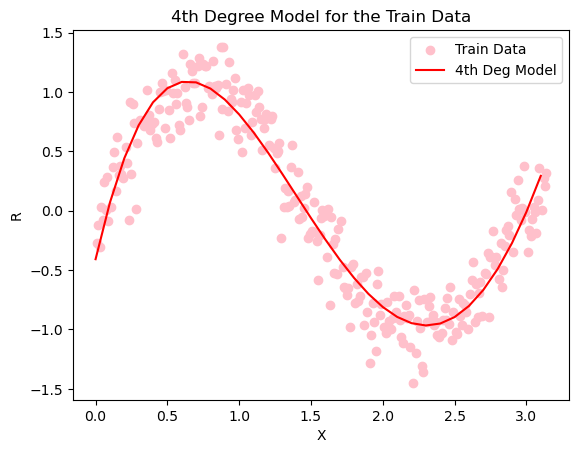

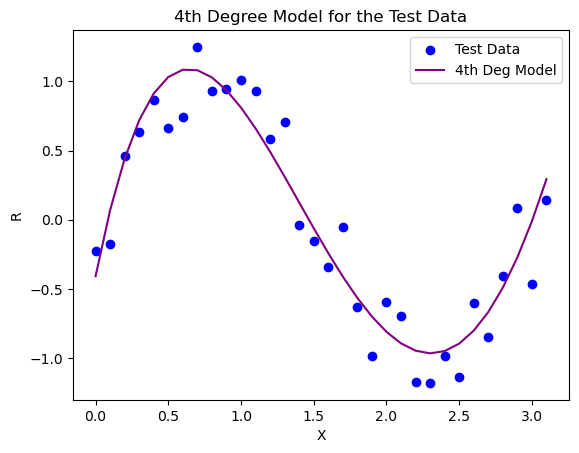

In [158]:

plt.title('4th Degree Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='pink',label='Train Data') # plot the scatter on training sets
plt.plot(test_x,pred_y,color='red',label='4th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('4th Degree Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='blue',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='purple',label='4th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it


## Now Fit The 5 degree Model

In [159]:
#Your code Here
matrix_A = np.array([[rows, np.sum(train_x), np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5)],
                      [np.sum(train_x), np.sum(train_x**2), np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6)],
                      [np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7)],
                      [np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8)],
                      [np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9)],
                      [np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9),np.sum(train_x**10)],
                     ]) # make the confusion matrix!

print(f'\nMatrix A : \n\n{matrix_A}')

matrix_B = np.array([[np.sum(train_y)],
                     [np.dot(train_x,train_y)],
                     [np.sum(train_y*(train_x**2))],
                     [np.sum(train_y*(train_x**3))],
                     [np.sum(train_y*(train_x**4))],
                     [np.sum(train_y*(train_x**5))],
                    ]) # make the matrix B

print(f'\nMatrix B : \n\n{matrix_B}')



Matrix A : 

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06]]

Matrix B : 

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]]


#### Compute Valus Of Six Θ`s

In [160]:
inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the 5th Degree Model: \n\n {matrix_X}')

Matrix X for the 5th Degree Model: 

 [[-0.15135453]
 [ 2.89713972]
 [-0.36242335]
 [-2.76674175]
 [ 1.48161173]
 [-0.20822932]]


### Run Predictions (Testing data)

In [161]:
# predict the values by the given formula

#matrix_X[0] = theta 0
#matrix_X[1] = theta 1
#matrix_X[2] = theta 2
#matrix_X[3] = theta 3
#matrix_X[4] = theta 4
#matrix_X[5] = theta 5

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) + np.dot(test_x**2,matrix_X[2]) + np.dot(test_x**3,matrix_X[3]) + np.dot(test_x**4,matrix_X[4]) + np.dot(test_x**5,matrix_X[5])
pred_y

array([-0.15135453,  0.13211454,  0.39374649,  0.62196231,  0.80823914,
        0.94686034,  1.03466564,  1.07080128,  1.0564701 ,  0.99468168,
        0.89000249,  0.74830595,  0.57652264,  0.38239036,  0.17420427,
       -0.03943297, -0.24986108, -0.44861205, -0.62766   , -0.77967106,
       -0.89825324, -0.97820634, -1.01577174, -1.00888238, -0.95741257,
       -0.86342788, -0.73143501, -0.56863168, -0.3851565 , -0.19433882,
       -0.01294867,  0.13855345])

### Mean Square Error

In [162]:
cost = np.sum((pred_y - test_y)**2)/len(test_y) # put the values in the formula

print(f'\nMean Square Error for 5th Deg MODEL is : {cost}\n')


Mean Square Error for 5th Deg MODEL is : 0.04420677426857728



### Plot Data (Train and Test Data)

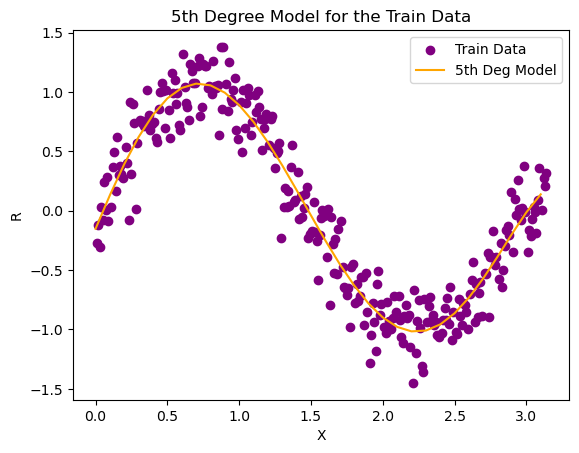

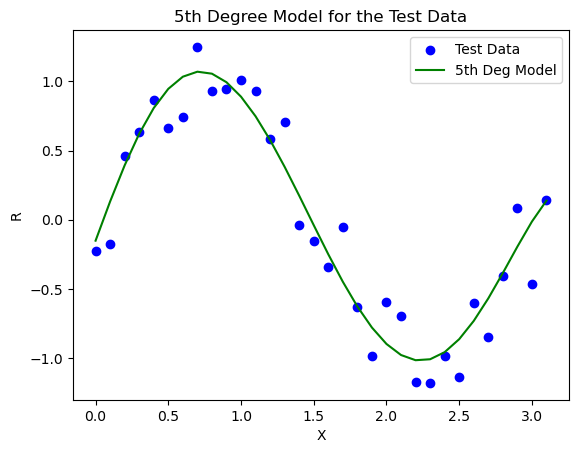

In [163]:
plt.title('5th Degree Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='purple',label='Train Data')# plot the scatter on training sets
plt.plot(test_x,pred_y,color='orange',label='5th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('5th Degree Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='blue',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='green',label='5th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

## Now Fit The 6 degree Model

In [164]:
#Your code Here
matrix_A = np.array([[rows, np.sum(train_x), np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6)],
                      [np.sum(train_x), np.sum(train_x**2), np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7)],
                      [np.sum(train_x**2),np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8)],
                      [np.sum(train_x**3),np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9)],
                      [np.sum(train_x**4),np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9),np.sum(train_x**10)],
                      [np.sum(train_x**5),np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9),np.sum(train_x**10),np.sum(train_x**11)],
                      [np.sum(train_x**6),np.sum(train_x**7),np.sum(train_x**8),np.sum(train_x**9),np.sum(train_x**10),np.sum(train_x**11),np.sum(train_x**12)],
                     ]) # make the confusion matrix!

print(f'\nMatrix A : \n\n{matrix_A}')

matrix_B = np.array([[np.sum(train_y)],
                     [np.dot(train_x,train_y)],
                     [np.sum(train_y*(train_x**2))],
                     [np.sum(train_y*(train_x**3))],
                     [np.sum(train_y*(train_x**4))],
                     [np.sum(train_y*(train_x**5))],
                     [np.sum(train_y*(train_x**6))],
                    ]) # make the matrix B

print(f'\nMatrix B : \n\n{matrix_B}')




Matrix A : 

[[2.83000000e+02 4.44950000e+02 9.32746500e+02 2.19978103e+03
  5.53385258e+03 1.45013383e+04 3.90864884e+04]
 [4.44950000e+02 9.32746500e+02 2.19978103e+03 5.53385258e+03
  1.45013383e+04 3.90864884e+04 1.07548336e+05]
 [9.32746500e+02 2.19978103e+03 5.53385258e+03 1.45013383e+04
  3.90864884e+04 1.07548336e+05 3.00624107e+05]
 [2.19978103e+03 5.53385258e+03 1.45013383e+04 3.90864884e+04
  1.07548336e+05 3.00624107e+05 8.50829605e+05]
 [5.53385258e+03 1.45013383e+04 3.90864884e+04 1.07548336e+05
  3.00624107e+05 8.50829605e+05 2.43237118e+06]
 [1.45013383e+04 3.90864884e+04 1.07548336e+05 3.00624107e+05
  8.50829605e+05 2.43237118e+06 7.01172536e+06]
 [3.90864884e+04 1.07548336e+05 3.00624107e+05 8.50829605e+05
  2.43237118e+06 7.01172536e+06 2.03540142e+07]]

Matrix B : 

[[ 1.39087000e+00]
 [-1.26641430e+02]
 [-3.78875690e+02]
 [-9.52324104e+02]
 [-2.30897053e+03]
 [-5.57500637e+03]
 [-1.35290159e+04]]


#### Compute Valus Of Seven Θ`s

In [165]:
inverse_matA = np.linalg.inv(matrix_A) # take inverse of the matrix

matrix_X = np.dot(inverse_matA,matrix_B) # take dot product of the matrices

print(f'Matrix X for the 6th Deg Model: \n\n {matrix_X}')


Matrix X for the 6th Deg Model: 

 [[-0.12883598]
 [ 2.59932802]
 [ 0.5809851 ]
 [-3.96416676]
 [ 2.19455082]
 [-0.40752775]
 [ 0.02110818]]


### Run Predictions (Testing data)

In [166]:
# predict the values by the given formula

#matrix_X[0] = theta 0
#matrix_X[1] = theta 1
#matrix_X[2] = theta 2
#matrix_X[3] = theta 3
#matrix_X[4] = theta 4
#matrix_X[5] = theta 5
#matrix_X[6] = theta 6

pred_y = matrix_X[0] + np.dot(test_x,matrix_X[1]) + np.dot(test_x**2,matrix_X[2]) + np.dot(test_x**3,matrix_X[3]) + np.dot(test_x**4,matrix_X[4]) + np.dot(test_x**5,matrix_X[5]) + np.dot(test_x**6,matrix_X[6])
pred_y

array([-0.12883598,  0.13315791,  0.38593792,  0.61301954,  0.80224005,
        0.94530746,  1.0373647 ,  1.07656896,  1.06368623,  1.00170109,
        0.89544163,  0.75121962,  0.57648583,  0.37950062,  0.16901961,
       -0.0460053 , -0.25670984, -0.45458602, -0.63173561, -0.78110839,
       -0.89672521, -0.97388591, -1.00936193, -1.00157385, -0.95075362,
       -0.85909166, -0.73086876, -0.57257273, -0.39299991, -0.20334145,
       -0.01725441,  0.14908235])

### Mean Square Error

In [167]:
cost = np.sum((pred_y - test_y)**2)/len(test_y) # put the values in the formula

print(f'\nMean Square Error for 6th deg MODEL is : {cost}\n')


Mean Square Error for 6th deg MODEL is : 0.04450867582834679



### Plot Data (Train and Test Data)

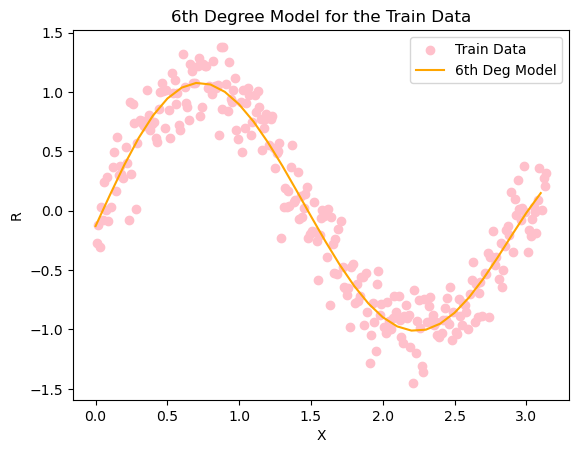

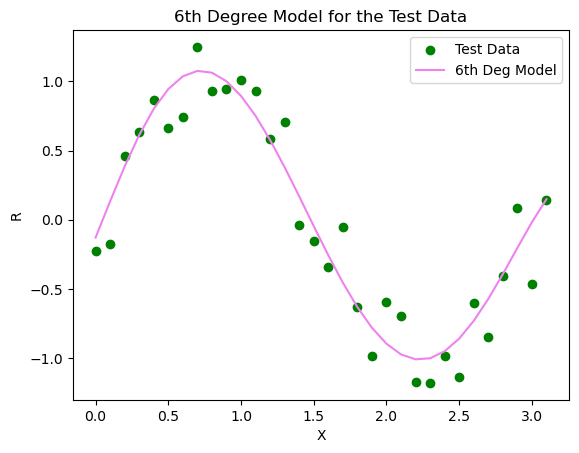

In [168]:
plt.title('6th Degree Model for the Train Data') # give the title
plt.scatter(train_x,train_y,color='pink',label='Train Data') # plot the scatter on training sets
plt.plot(test_x,pred_y,color='orange',label='6th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

plt.title('6th Degree Model for the Test Data') # give the title
plt.scatter(test_x,test_y,color='green',label='Test Data') # plot the scatter on testing sets
plt.plot(test_x,pred_y,color='violet',label='6th Deg Model') # make a line plot of testing input and predicted values of y
plt.legend() # to show the label
plt.xlabel('X') # set label for X-axis
plt.ylabel('R') # set label for Y-axis
plt.show() # display it

### Comment on the results by comparing all of your models

#### Based on these findings:

The linear and quadratic models have the same MSE, indicating they have similar predictive performance.

In comparison to the linear and quadratic models, the cubic model has a little lower MSE, indicating that it more closely fits the data.

As the polynomial's degree rises from cubic to fifth degree, the MSE keeps falling, suggesting better performance.

Comparing the 6th-degree polynomial model to the 5th-degree polynomial model, there is a minor rise in MSE. This rise could be a sign of overfitting, a phenomenon in which a model matches training data too closely and performs poorly when applied to fresh data.

#### In general, according to the MSE values:
The polynomial models of the cubic, fourth, and fifth degrees appear to offer the optimum trade-off between predictive effectiveness and model complexity.